In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
dataset = pd.read_csv("../data/archive/credit_risk_dataset.csv")
dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
dataset.shape

(32581, 12)

### Visualisando algumas estatísticas
Utilizamos o describe()

In [7]:
dataset.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Podemos retornar alguns filtros, a pessoa que mais ganha nessa base de dados

In [25]:
dataset["person_income"].max()

6000000

In [19]:
dataset[dataset["person_income"] >= 5999500.685578]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.0,N,25


### O cliente com a menor dívida

In [41]:
x = dataset[dataset["loan_amnt"]<= 500]
x

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
871,26,19500,RENT,0.0,MEDICAL,C,500,11.41,0,0.03,N,2
1355,22,26000,MORTGAGE,3.0,PERSONAL,B,500,10.46,0,0.02,N,4
8607,26,59000,MORTGAGE,7.0,HOMEIMPROVEMENT,B,500,9.76,0,0.01,N,2
15951,26,7904,MORTGAGE,0.0,HOMEIMPROVEMENT,B,500,10.71,0,0.06,N,3
18502,33,18000,RENT,0.0,DEBTCONSOLIDATION,A,500,NaN,0,0.03,N,6


In [39]:
x

person_age                                   22
person_income                              7904
person_home_ownership                  MORTGAGE
person_emp_length                           0.0
loan_intent                   DEBTCONSOLIDATION
loan_grade                                    A
loan_amnt                                   500
loan_int_rate                              9.76
loan_status                                   0
loan_percent_income                        0.01
cb_person_default_on_file                     N
cb_person_cred_hist_length                    2
dtype: object

# Visualização dos dado

### Vamos fazer uma contagem de quantos registros existem em cada classe, onde 0 é quando a pessoa paga o empréstimo e a classe 1 é quando não paga o empréstimo. Em seguida vamos pegar a quantidade com o return_count = True, mostrando quantas pessoas pagaram já o empréstimo e quantas não pagaram o empréstimo

In [67]:
np.unique(dataset["loan_status"], return_counts=True)

(array([0, 1], dtype=int64), array([25473,  7108], dtype=int64))

Exibindo no seaborn

<Axes: xlabel='loan_status', ylabel='count'>

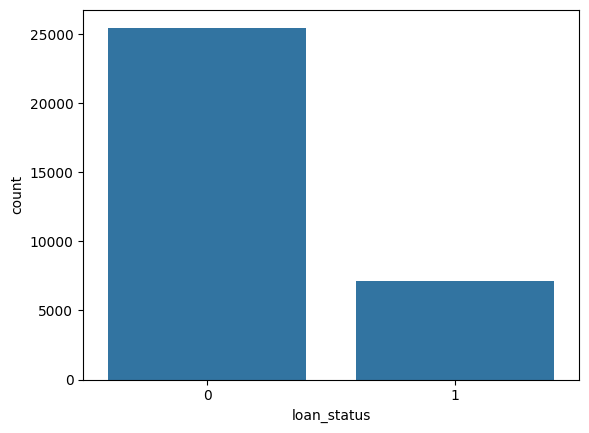

In [66]:
sns.countplot(x = dataset["loan_status"])

Exibindo o histograma das idades, coloque o ponto e vírgula se vc quiser visualizar apenas o gráfico sem os dados saindo no terminal

(array([2.693e+04, 4.891e+03, 6.510e+02, 8.900e+01, 1.300e+01, 2.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00]),
 array([ 20. ,  32.4,  44.8,  57.2,  69.6,  82. ,  94.4, 106.8, 119.2,
        131.6, 144. ]),
 <BarContainer object of 10 artists>)

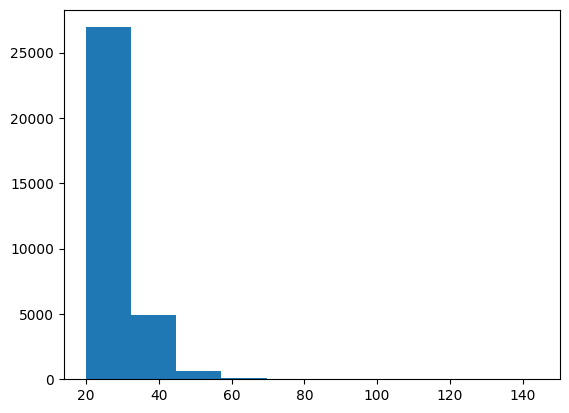

In [53]:
plt.hist(dataset["person_age"])

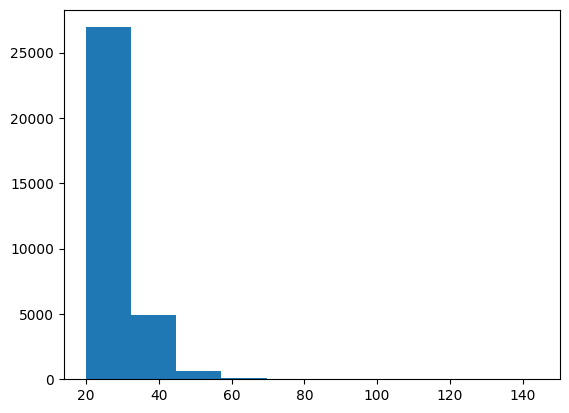

In [62]:
plt.hist(dataset["person_age"]);

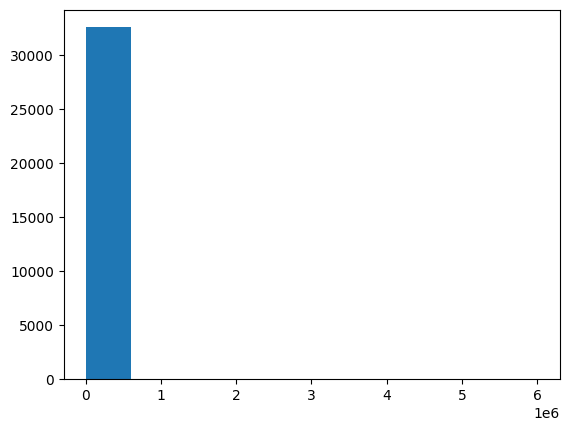

In [61]:
plt.hist(x = dataset["person_income"]);

In [59]:
dataset.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000
